In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Load the dataset
data = pd.read_csv("song_lyrics_new.csv")

# Create input text by combining the song and lyrics columns
data['input_text'] = data['song'] + " " + data['lyrics']

# Split the data into features (X) and target (y)
X = data['input_text']
y = data['artist']

# Check the first few rows to understand the structure
data.head()


,artist,song,lyrics,input_text
0,Kendrick Lamar,HiiiPoWeR,Everybody put three fingers in the air The sky...,HiiiPoWeR Everybody put three fingers in the a...
1,Kendrick Lamar,ADHD,Uh-uh fuck that Eight doobies to the face ...,ADHD Uh-uh fuck that Eight doobies to the f...
2,Kendrick Lamar,m.A.A.d city (Solo Part),If Pirus and Crips all got along They'd probab...,m.A.A.d city (Solo Part) If Pirus and Crips al...
3,Kendrick Lamar,Alright,Alls my life I has to fight nigga\nAlls my li...,Alright Alls my life I has to fight nigga\nAl...
4,Kendrick Lamar,The Art of Peer Pressure,Everybody everybody everybodyEverybody sit y...,The Art of Peer Pressure Everybody everybody ...


In [3]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the train and test datasets
(X_train.shape, X_test.shape)

((100,), (26,))

In [9]:
# Create a pipeline with CountVectorizer and Naive Bayes classifier
pipeline = make_pipeline(
    CountVectorizer(stop_words='english'),
    MultinomialNB()
)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Check if the model is trained by making a prediction
sample_text = X_test.iloc[0]  # Take a sample text from the test set
predicted_artist = pipeline.predict(["Tryna strike a chord and it's probably A minorrr"])
print(f"Predicted Artist for the sample text: {predicted_artist[0]}")

Predicted Artist for the sample text: Kendrick Lamar


In [10]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Check the first few predictions against the actual values
prediction_comparison = pd.DataFrame({'True': y_test, 'Predicted': y_pred})
prediction_comparison.head()

,True,Predicted
73,Michael Jackson,Bob Marley
19,Kendrick Lamar,Kendrick Lamar
116,Bob Marley,Bob Marley
67,Michael Jackson,Michael Jackson
94,Bob Marley,Bob Marley


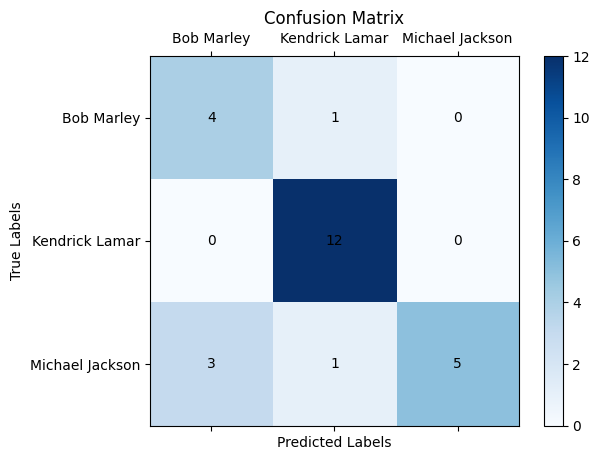

In [15]:
# Use the actual class names from the data
class_names = np.unique(y_test)  # Get unique class labels from y_test

# Create the plot
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap='Blues')
fig.colorbar(cax)

# Set axes labels
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Set tick marks and labels
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Annotate each cell with the value
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.title('Confusion Matrix')
plt.show()

In [16]:
# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
                 precision    recall  f1-score   support

     Bob Marley       0.57      0.80      0.67         5
 Kendrick Lamar       0.86      1.00      0.92        12
Michael Jackson       1.00      0.56      0.71         9

       accuracy                           0.81        26
      macro avg       0.81      0.79      0.77        26
   weighted avg       0.85      0.81      0.80        26



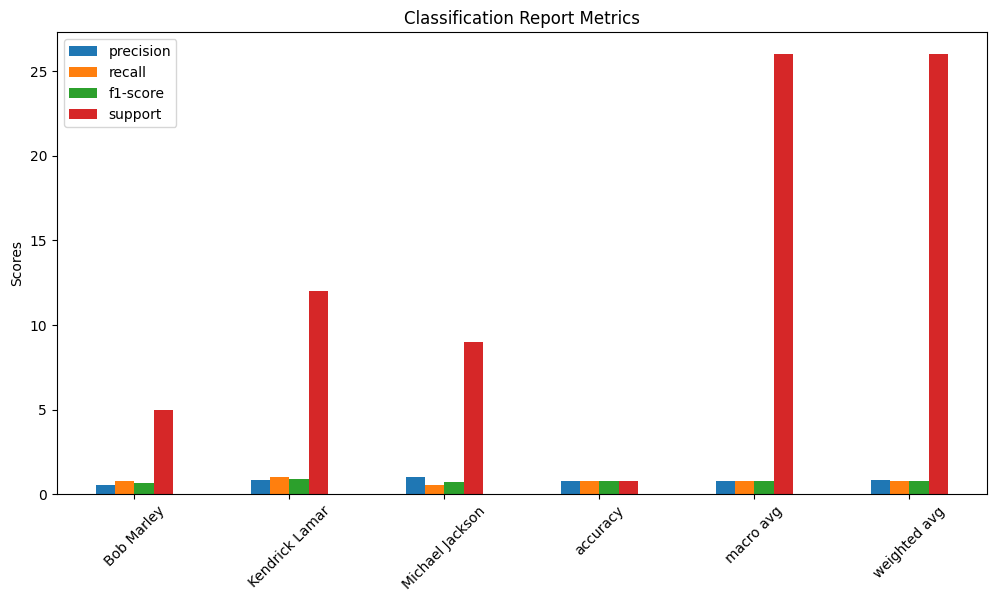

In [18]:
# Plot a bar chart of the classification report metrics
report_data = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_data).transpose()

# Plot the classification report as a bar chart
report_df.plot(kind='bar', figsize=(12, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()